In [68]:
########################################
# IF CODE CRASHES THEN RE-RUN THE CODE #
# POSSIBLE REASONS: INTERNET SLOW DOWN #
# WHILE EXECUTING THE CODE             #
########################################


# Packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re



# Disable Chrome Browser Notification
option = Options()
option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})


# Create driver session
driver = webdriver.Chrome(options=option,executable_path = '/Users/gourabsinha/Desktop/Data Science/Packages/chromedriver')


In [69]:
#Q1. Login to Instagram
"""
Answer: Here I have visited the site and then I found the input fields where I will need to 
input the user name and the password and then I have passed the inputs with the
send key function. Once these two fields are filled with correct username and password
I just clicked on the login button which I have found using button tag.
"""


driver.get('https://instagram.com/')

# Credentials
username = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "username")))
password = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "password")))
username.clear()
password.clear()
username.send_keys("sample")
password.send_keys("sample@1234")

btn = driver.find_elements_by_tag_name("button")
btn[1].click()


In [70]:
#Q1
"""
Answer: Just to make sure I am on correct site so I again visited Instagram.com
Once that is done, now we logged into account in the previous question script so
we don't need to do it again. I tried to find the search input field with
xpath and then I clear the input fields so that we are not putting
any unwanted value. After that I put only required value and then waited for 
the list to appear. Once the list appear I have picked all the options
that were showing and then I segregated the user_handles with hashtags and location 
by explore and store to a list. Which I am printing at the last. 
"""


def get_follower_count(user_handle): 
    time.sleep(1)
    base_url = "https://instagram.com"
    driver.get(base_url+user_handle[1])
    time.sleep(2)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    user_id_followers.append([follower_count,user_handle[0],user_handle[1]])



driver.get('https://instagram.com/')
search_input =    driver.find_element_by_xpath("//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys("food")
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='fuqBx']//a")))

# Store user_handles
store_user_ids = []
for user_id in user_ids:
    html_content = user_id.get_attribute('outerHTML')
    data = BeautifulSoup(html_content,'html.parser').a['href']
    user_id = data.split('/')[1]
    if user_id!='explore':
        store_user_ids.append([user_id,data])
        

store_user_ids = store_user_ids[:10]

user_id_followers = []

    
for user_id in store_user_ids:
    get_follower_count(user_id)

user_id_followers.sort(reverse=True)
user_id_followers = user_id_followers[:5]
for user_id in user_id_followers:
    print(user_id)






[10155407, 'foodnetwork', '/foodnetwork/']
[7042628, 'love_food', '/love_food/']
[3770487, 'buzzfeedfood', '/buzzfeedfood/']
[3587032, 'foodgod', '/foodgod/']
[3316023, 'foodandwine', '/foodandwine/']


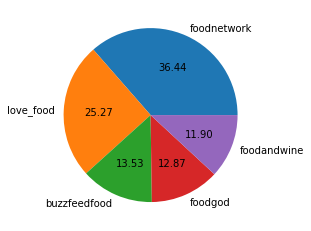

In [71]:
# Pie Graph just to get the idea which user_handle has more followers.
counts = [i[0] for i in user_id_followers]
user_ids = [i[1] for i in user_id_followers]
plt.pie(counts,labels=user_ids,autopct="%.2f")
plt.show()

In [72]:

#Q5.1 - Q5.2 Like and Unlike Top 30 Posts
"""
Answer: Here I have created one function which is handling like and dislike of posts.
The function takes one argument i.e what we want to do and based on that it likes or unlikes
the post and it does for top 30 posts. If any post is already liked or unliked then it prints
that the following action which we want to do has already been done. Process of searching
the handle is same. 
"""


def post_date_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 0
    try:
        while True:
            time_of_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//a[@class='c-Yi7']/time")))
            date_of_post = BeautifulSoup(time_of_post.get_attribute('outerHTML'),'html.parser').find('time').get('title')
            date_of_post = date_of_post.replace(',', '')
            post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
            current_date = datetime.today().strftime('%Y-%m-%d')
            current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
            difference_in_date = (current_date-post_date).days
            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            next_post.click()
            if difference_in_date>3:
                break
                
            no_of_posts+=1
            time.sleep(2)
    except:
        return no_of_posts
        
    return no_of_posts;        
        
user_handles = []
post_counts = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_count = post_date_check(user_detail[2])
    post_counts.append(post_count)
    time.sleep(3)
    




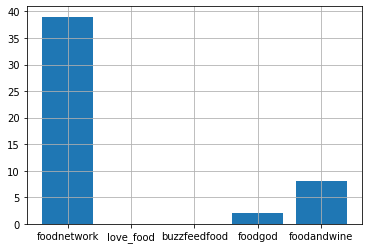

In [73]:
plt.bar(user_handles,post_counts)
plt.grid()
plt.show()

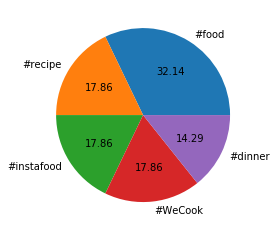

In [83]:
# Question 2.1-2.5

def post_date_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 1
    texts = ""
    try:
        while True:
            content = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='C4VMK']/span")))
            text = BeautifulSoup(content.get_attribute('outerHTML'),'html.parser').find('span').text
            texts = texts + str(" ") + str(text) 
            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            next_post.click()
            if no_of_posts==10:
                break
                
            no_of_posts+=1
            time.sleep(2)
    except:
        return texts
        
    return texts        

# Special Characters
characters_not_required = "[👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

def get_word_frequency(content,words_dictionary,hastag_dictionary):
    words = content.split(" ")
    for word in words:
        word = re.sub(characters_not_required, "", word)
        if word!="":
            if word[0]=="#":
                hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
                continue
            words_dictionary[word] = words_dictionary.get(word,0)+1
            
            
    

user_handles = []
post_contents = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_content = post_date_check(user_detail[2])
    post_contents.append(post_content)
    time.sleep(3)
    
words_dictionary = {}
hastag_dictionary = {}
for content in post_contents:
    get_word_frequency(content,words_dictionary,hastag_dictionary)
    

words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]

columns = {"Word":words,"Frequency":word_frequency}
words_df = pd.DataFrame(columns)
words_df.to_csv(r'WordFrequency.csv', index=False)



hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()
    
